# Сколько токенов?

Настроим систему; подготовим структуры данных для разных типов ошибок и заполним их всеми вхождениями из корпуса:

In [ ]:
import os
import pandas as pd
import nltk

Tokens = pd.DataFrame({
    'file': [],
    'num_tokens': []
})

lex_item_choice = pd.DataFrame({
    'file': [],
    'id': [],
    'type': [],
    'start': [],
    'end': [],
    'string': [],
    'correction': []
})

lex_part_choice = pd.DataFrame({
    'file': [],
    'id': [],
    'type': [],
    'start': [],
    'end': [],
    'string': [],
    'correction': []
})

Word_choice = pd.DataFrame({
    'file': [],
    'id': [],
    'type': [],
    'start': [],
    'end': [],
    'string': [],
    'correction': []
})

Anns = 14358
I = 0
'''
Dummy = [".\\2012-2014\\esl_00011.txt", ".\\2012-2014\\esl_00012.txt", ".\\2012-2014\\esl_00013.txt", ".\\2012-2014\\esl_00014.txt", ".\\2012-2014\\esl_00015.txt", ".\\2012-2014\\esl_00016.txt"]
Dummy += [".\\2012-2014\\esl_00011.ann", ".\\2012-2014\\esl_00012.ann", ".\\2012-2014\\esl_00013.ann", ".\\2012-2014\\esl_00014.ann", ".\\2012-2014\\esl_00015.ann", ".\\2012-2014\\esl_00016.ann"]
if True:
    for file in Dummy:
'''
for root, dirs, files in os.walk('.'):
    for file in os.listdir(root):
        #path = file # !!! DELETE THIS AFTER TEST
        if file.endswith(".ann"):
            I += 1
            print(str(I)+'/'+str(Anns),'('+'{:.2f}'.format((I/Anns)*100)+'%):','Evaluating',file)
            path = root+os.sep+file
            with open(path, 'r', encoding='utf-8') as f:
                annfield = []
                TempDict = {}
                for line in f.readlines():
                    if line[0] == "A":
                        continue
                    try:
                        entry = line[:-1]
                        entry = entry.split("\t")
                        entry = [entry[0]] + entry[1].split(" ") + [entry[2]]
                        entry = [path] + entry + [None]
                        if entry[1][0] != "#":
                            entry = entry[:3] + [int(entry[3])] + [int(entry[4])] + entry[5:]
                        annfield.append(entry)
                    except Exception as e:
                        print(str(e))
                for entry in annfield:
                    if entry[2] in {'lex_item_choice', 'lex_part_choice', 'Word_choice'}:
                        TempDict[entry[1]] = entry
                for entry in annfield:
                    if entry[2] == "AnnotatorNotes":
                        if entry[3] in TempDict:
                            TempDict[entry[3]][-1] = entry[-2]
            for ID in TempDict:
                entry = TempDict[ID]
                if entry[2] == 'lex_item_choice':
                    lex_item_choice.loc[len(lex_item_choice)] = entry
                if entry[2] == 'lex_part_choice':
                    lex_part_choice.loc[len(lex_part_choice)] = entry
                if entry[2] == 'Word_choice':
                    Word_choice.loc[len(Word_choice)] = entry
        if file.endswith(".txt"):
            path = root+os.sep+file
            with open(path, 'r', encoding='utf-8') as f:
                X = nltk.word_tokenize(f.read())
                Tokens.loc[len(Tokens)] = [path, len(X)]
# print(Anns)

Вот столько токенов находится в файлах коллекции при использовании nltk.word_tokenize():

In [122]:
Tokens

,file,num_tokens
0,.\2012-2014\esl_00011.txt,398.0
1,.\2012-2014\esl_00012.txt,292.0
2,.\2012-2014\esl_00013.txt,434.0
3,.\2012-2014\esl_00014.txt,610.0
4,.\2012-2014\esl_00015.txt,184.0
5,.\2012-2014\esl_00016.txt,181.0
6,.\2012-2014\esl_00017.txt,483.0
7,.\2012-2014\esl_00018.txt,207.0
8,.\2012-2014\esl_00019.txt,303.0
9,.\2012-2014\esl_00020.txt,356.0


Так выглядят некоторые ошибки типа Word Choice:

In [123]:
Word_choice

,file,id,type,start,end,string,correction,string_tokens
0,.\2012-2014\esl_00011.ann,T28,Word_choice,1584.0,1597.0,use a help of,place the decision with,4
1,.\2012-2014\esl_00013.ann,T12,Word_choice,1253.0,1263.0,considered,taken in account,1
2,.\2012-2014\esl_00013.ann,T20,Word_choice,1981.0,1989.0,anything,things,1
3,.\2012-2014\esl_00014.ann,T5,Word_choice,613.0,619.0,unreal,altogether unreal,1
4,.\2012-2014\esl_00017.ann,T10,Word_choice,637.0,645.0,one time,one day OR once,2
5,.\2012-2014\esl_00018.ann,T4,Word_choice,556.0,566.0,the rock,the best rock,2
6,.\2012-2014\esl_00018.ann,T7,Word_choice,933.0,935.0,in,the picture,1
7,.\2012-2014\esl_00018.ann,T10,Word_choice,1023.0,1029.0,summer,great summer,1
8,.\2012-2014\esl_00019.ann,T1,Word_choice,77.0,81.0,were,before/used to be,1
9,.\2012-2014\esl_00019.ann,T3,Word_choice,241.0,249.0,going on,so/does that happen repeatedly,2


Вот так выглядят ошибки типа Choice of lexical item. Видно, что это больше про синонимы и семантику:

In [124]:
lex_item_choice

,file,id,type,start,end,string,correction,string_tokens
0,.\2012-2014\esl_00011.ann,T9,lex_item_choice,436.0,444.0,imagined,thought,1
1,.\2012-2014\esl_00011.ann,T11,lex_item_choice,582.0,587.0,usual,simple,1
2,.\2012-2014\esl_00011.ann,T24,lex_item_choice,1412.0,1417.0,apply,refer,1
3,.\2012-2014\esl_00011.ann,T37,lex_item_choice,1915.0,1926.0,indifferent,negligent,1
4,.\2012-2014\esl_00011.ann,T30,lex_item_choice,1807.0,1816.0,were said,revealed,2
5,.\2012-2014\esl_00011.ann,T19,lex_item_choice,1778.0,1786.0,revealed,submitted,1
6,.\2012-2014\esl_00011.ann,T39,lex_item_choice,979.0,987.0,expected,urged,1
7,.\2012-2014\esl_00012.ann,T6,lex_item_choice,748.0,752.0,keep,stick to,1
8,.\2012-2014\esl_00012.ann,T13,lex_item_choice,446.0,450.0,ways,mode,1
9,.\2012-2014\esl_00012.ann,T14,lex_item_choice,435.0,441.0,affect,change,1


А так выглядят ошибки Choice of part of lexical item:

In [125]:
lex_part_choice

,file,id,type,start,end,string,correction,string_tokens
0,.\2012-2014\esl_00013.ann,T9,lex_part_choice,1990.0,2003.0,to the better,for the better,3
1,.\2012-2014\esl_00014.ann,T1,lex_part_choice,1.0,11.0,the course,In the course,2
2,.\2012-2014\esl_00015.ann,T3,lex_part_choice,466.0,471.0,to be,to be taken care of,2
3,.\2012-2014\esl_00015.ann,T7,lex_part_choice,869.0,871.0,is,is expected,1
4,.\2012-2014\esl_00032.ann,T24,lex_part_choice,2483.0,2494.0,specialists,specialists here,1
5,.\2012-2014\esl_00042.ann,T4,lex_part_choice,151.0,155.0,pass,take,1
6,.\2012-2014\esl_00042.ann,T30,lex_part_choice,2365.0,2369.0,pass,take,1
7,.\2012-2014\esl_00042.ann,T43,lex_part_choice,1038.0,1047.0,as adults,mature,2
8,.\2012-2014\esl_00069.ann,T5,lex_part_choice,319.0,332.0,sides of life,walks of life,3
9,.\2012-2014\esl_00091.ann,T3,lex_part_choice,507.0,516.0,of people,plenty of people,2


Choice of lexical item class seems the most complete and the most relevant for our task

In [126]:
sum(Tokens['num_tokens']) # the total number of tokens (words and punctuation) in REALEC corpus

4075618.0

Посмотрим, сколько токенов приходится на ошибку каждого типа. Здесь я снова использовал nltk.word_tokenize(), но затем перешёл на nltk.TweetTokenizer. Ключевое отличие в том, что word_tokenize() разбивает слова с апострофом на два токена: так, hasn't соответствует двум токенам "has" и "n't", Michael's превратится в два токена "Michael" и "'s". TweetTokenizer не разбивает слова с апострофом и даст "hasn't" и "Michael's". Так как разметка REALEC в целом следует второму принципу (ошибка не вешается отдельно на часть после апострофа), я счёл TweetTokenizer более подходящим для нашей задачи. Другое свойство обоих токенайзеров заключается в том, что знаки пунктуации -- тире, запятые, финальные точки и т. п. -- считаются за отдельный токен. 

In [121]:
Word_choice['string_tokens'] = Word_choice.apply(lambda x: len(nltk.word_tokenize(x['string'])), axis=1)
lex_item_choice['string_tokens'] = lex_item_choice.apply(lambda x: len(nltk.word_tokenize(x['string'])), axis=1)
lex_part_choice['string_tokens'] = lex_part_choice.apply(lambda x: len(nltk.word_tokenize(x['string'])), axis=1)

На всякий случай коллекции стоит сохранить:

In [132]:
with open('Word_choice.json', 'w', encoding="utf-8") as wc:
    wc.write(Word_choice.to_json())
with open('lex_item_choice.json', 'w', encoding="utf-8") as lic:
    lic.write(lex_item_choice.to_json())
with open('lex_part_choice.json', 'w', encoding="utf-8") as lpc:
    lpc.write(lex_part_choice.to_json())

Теперь построим графики для наших коллекций. Подготовим для этог почву:

In [133]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Сколько токенов (в понимании nltk.word_tokenize) приходится на ошибку типа Choice of lexical item? По горизонтали -- количество токенов в строке ошибки (не в строке исправления!), по вертикали -- количество соответствующих вхождений.

<Figure size 432x288 with 0 Axes>

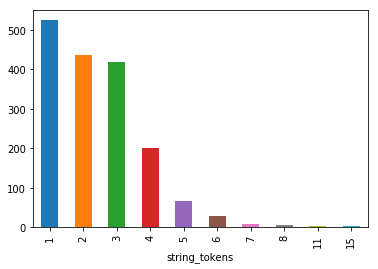

<Figure size 432x288 with 0 Axes>

In [134]:
lex_part_choice.groupby('string_tokens')['file'].size().plot(kind='bar')
plt.figure()

Проверим, что мы ничего не потеряли -- ошибок Choice of part of lexical item всё так же 1692:

In [135]:
sum(lex_part_choice.groupby('string_tokens')['file'].size())

1692

А как обстоит картина с Choice of lexical item?

<Figure size 432x288 with 0 Axes>

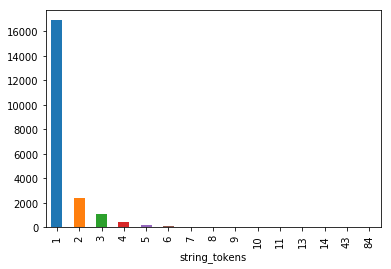

<Figure size 432x288 with 0 Axes>

In [136]:
lex_item_choice.groupby('string_tokens')['file'].size().plot(kind='bar')
plt.figure()

Ого, какая разница между односложными ошибками и всеми остальными! И мы снова ничего не потеряли по пути:

In [137]:
sum(lex_item_choice.groupby('string_tokens')['file'].size())

21014

Наконец, посмотрим ситуацию для Word choice:

<Figure size 432x288 with 0 Axes>

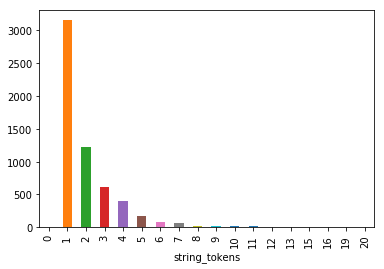

<Figure size 432x288 with 0 Axes>

In [138]:
Word_choice.groupby('string_tokens')['file'].size().plot(kind='bar')
plt.figure()

Нечто среднее, и для нашей задачи всё ещё лучше Choice of lexical item. Обязательная проверка:

In [139]:
sum(Word_choice.groupby('string_tokens')['file'].size())

5804

Официально остановим наш выбор на однотокенных ошибках типа Choice of lexical item (заодно посмотрим, сколько их в процентном соотношении по сравнению с другими ошибками того же типа):

In [142]:
q = lex_item_choice.groupby('string_tokens')['file'].size()

In [150]:
print("One-word errors account for "+"{:.2f}".format(100*q[1]/sum(q))+"% of Choice of lexical items errors. Therefore, we'll stick with this error class for future analysis")

One-word errors account for 80.41% of Choice of lexical items errors. Therefore, we'll stick with this error class for future analysis


Да, кстати, а сколько их всего?

In [152]:
q[1]

16897

На этом закончим анализ коллекции ошибок и перейдём к подготовке датасета для обучения модели BERT